In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Load the dataset
file_path = '/Users/abhinav/Desktop/School/MSBA/2nd Semester/Advanced Programming/Data/Raw Data/Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_month.csv'
data = pd.read_csv(file_path)

# Show the first few rows and the column names to understand the structure
data.head(), data.columns

(   RegionID  SizeRank       RegionName RegionType StateName     1996-02-29  \
 0    102001         0    United States    country       NaN  101974.243981   
 1    394913         1     New York, NY        msa        NY  178886.438765   
 2    753899         2  Los Angeles, CA        msa        CA  183979.711478   
 3    394463         3      Chicago, IL        msa        IL  129302.420536   
 4    394514         4       Dallas, TX        msa        TX  109454.091687   
 
       1996-03-31     1996-04-30     1996-05-31     1996-06-30  ...  \
 0  102232.420950  102779.727988  103524.018573  104327.643423  ...   
 1  178149.563306  177978.593540  178203.428078  179067.247633  ...   
 2  185116.621447  185977.073063  186341.801871  186979.330135  ...   
 3  128711.067254  130122.717229  131799.780985  133356.494598  ...   
 4  110129.928049  111180.303297  112027.708339  112534.276976  ...   
 
       2024-03-31     2024-04-30     2024-05-31     2024-06-30     2024-07-31  \
 0  352874.4115

In [3]:
# Filter the data for New Orleans
new_orleans_data = data[data['RegionName'].str.contains('New Orleans', case=False, na=False)]

# Show the first few rows of the filtered data
new_orleans_data.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,...,2024-03-31,2024-04-30,2024-05-31,2024-06-30,2024-07-31,2024-08-31,2024-09-30,2024-10-31,2024-11-30,2024-12-31
46,394910,47,"New Orleans, LA",msa,LA,88678.431172,89265.049796,91127.974993,91773.495808,92795.915804,...,235688.688376,238134.538154,239011.751568,238930.521802,239816.801839,238287.689942,236422.935033,236102.44464,235266.130022,233673.471186


In [4]:
# Exclude the "Average_Home_Value" column and focus on date columns
date_columns = new_orleans_data.columns[5:-1]  # Ignore the first 5 columns and the last one (Average_Home_Value)

# Convert the date columns to datetime format
column_dates = pd.to_datetime(date_columns, format='%Y-%m-%d')

# Create new 'Year' and 'Month' columns based on the date columns
new_orleans_data_transposed = new_orleans_data.iloc[:, 5:-1].transpose()
new_orleans_data_transposed['Year'] = column_dates.year
new_orleans_data_transposed['Month'] = column_dates.month

# Display the first few rows to verify the changes
new_orleans_data_transposed.head()

,46,Year,Month
1996-02-29,88678.431172,1996,2
1996-03-31,89265.049796,1996,3
1996-04-30,91127.974993,1996,4
1996-05-31,91773.495808,1996,5
1996-06-30,92795.915804,1996,6


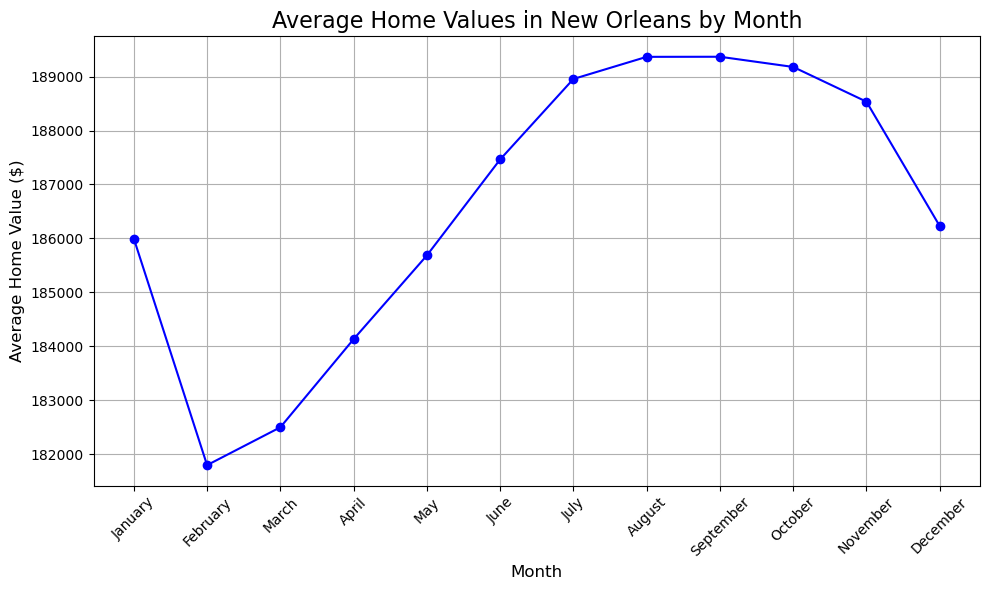

In [5]:
# Calculate the average for each month across all years
monthly_averages = new_orleans_data_transposed.groupby('Month').mean()

# Convert month numbers to month names for better readability
monthly_averages.index = monthly_averages.index.map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Plotting the monthly averages
plt.figure(figsize=(10, 6))
plt.plot(monthly_averages.index, monthly_averages.iloc[:, 0], marker='o', linestyle='-', color='b')
plt.title('Average Home Values in New Orleans by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Home Value ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

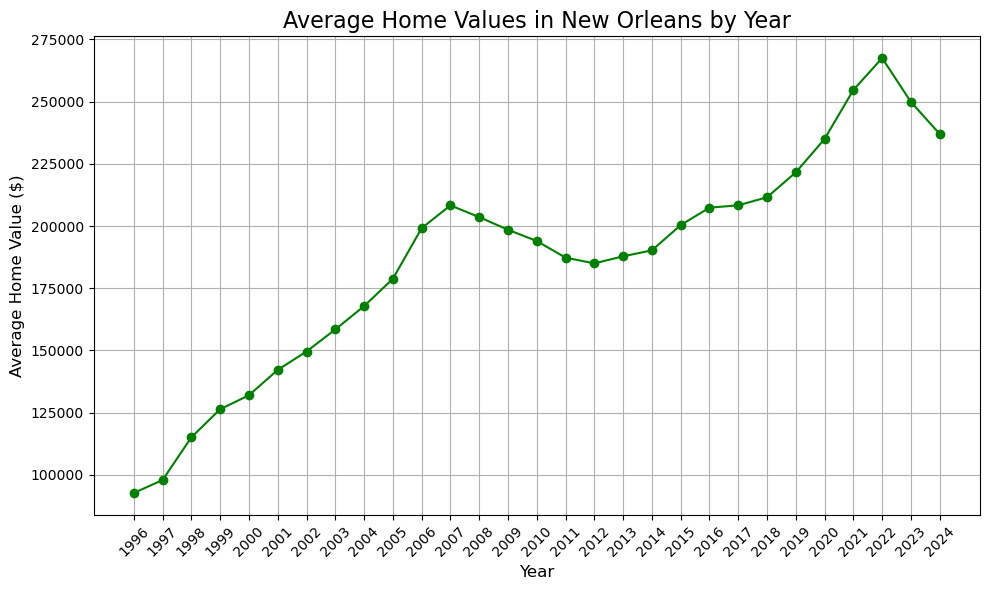

In [6]:
# Calculate the average home value for each year
yearly_averages = new_orleans_data_transposed.groupby('Year').mean()

# Plotting the yearly averages
plt.figure(figsize=(10, 6))
plt.plot(yearly_averages.index, yearly_averages.iloc[:, 0], marker='o', linestyle='-', color='g')
plt.title('Average Home Values in New Orleans by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Home Value ($)', fontsize=12)
plt.xticks(yearly_averages.index, rotation=45)  # Set the x-axis labels to show every year
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

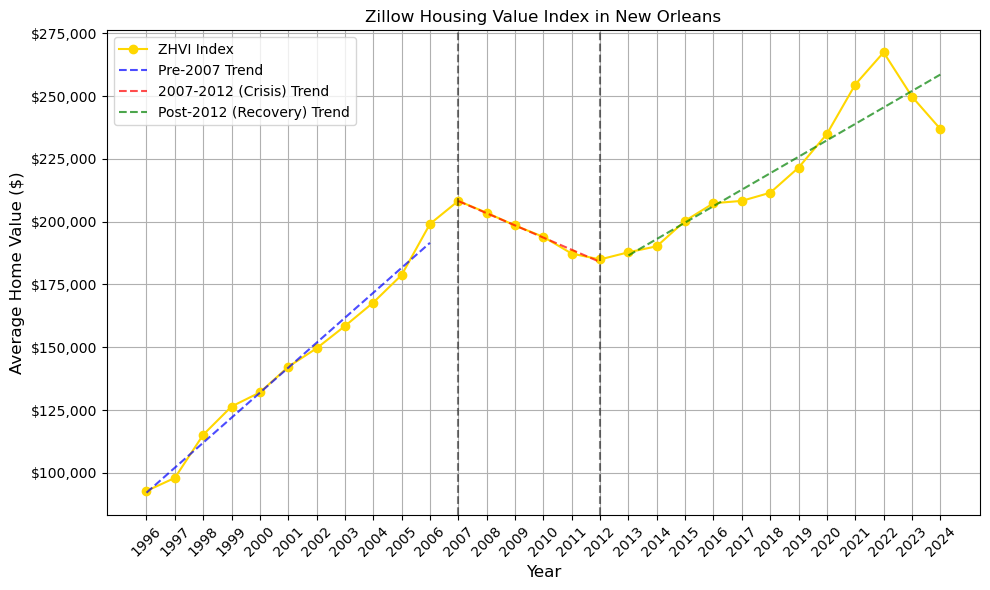

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Define x segments
x_pre = yearly_averages.index[yearly_averages.index < 2007]
x_crisis = yearly_averages.index[(yearly_averages.index >= 2007) & (yearly_averages.index <= 2012)]
x_post = yearly_averages.index[yearly_averages.index > 2012]

# Define y segments
y_pre = yearly_averages.loc[x_pre].iloc[:, 0]
y_crisis = yearly_averages.loc[x_crisis].iloc[:, 0]
y_post = yearly_averages.loc[x_post].iloc[:, 0]

# Compute linear regression fits (slope and intercept) for each segment
slope_pre, intercept_pre = np.polyfit(x_pre, y_pre, 1)
slope_crisis, intercept_crisis = np.polyfit(x_crisis, y_crisis, 1)
slope_post, intercept_post = np.polyfit(x_post, y_post, 1)

# Plotting the graph with requested color and legend adjustments
plt.figure(figsize=(10, 6))

# Plotting the solid line for the ZHVI index in golden yellow
plt.plot(yearly_averages.index, yearly_averages.iloc[:, 0], marker='o', linestyle='-', color='#FFD700', label='ZHVI Index')

# Adding trend lines for each section with adjusted colors
plt.plot(x_pre, slope_pre * x_pre + intercept_pre, linestyle='--', color='blue', alpha=0.7, label='Pre-2007 Trend')
plt.plot(x_crisis, slope_crisis * x_crisis + intercept_crisis, linestyle='--', color='red', alpha=0.7, label='2007-2012 (Crisis) Trend')
plt.plot(x_post, slope_post * x_post + intercept_post, linestyle='--', color='green', alpha=0.7, label='Post-2012 (Recovery) Trend')

# Add vertical dashed lines to separate the periods
plt.axvline(x=2007, color='black', linestyle='--', alpha=0.5)
plt.axvline(x=2012, color='black', linestyle='--', alpha=0.5)

# Adding labels and title
plt.title('Zillow Housing Value Index in New Orleans', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Home Value ($)', fontsize=12)

# Formatting the y-axis with dollar sign and commas
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Formatting the x-axis with year labels
plt.xticks(yearly_averages.index, rotation=45)

# Adding grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

0     92744.729573
1     97954.519270
2    115116.293319
3    126395.820280
4    132000.765937
Name: 46, dtype: float64
                               SARIMAX Results                                
Dep. Variable:                     46   No. Observations:                   29
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -293.800
Date:                Mon, 27 Jan 2025   AIC                            593.600
Time:                        14:04:28   BIC                            597.597
Sample:                             0   HQIC                           594.822
                                 - 29                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8956      0.107      8.371      0.000       0.686       1.105
ma.L1      

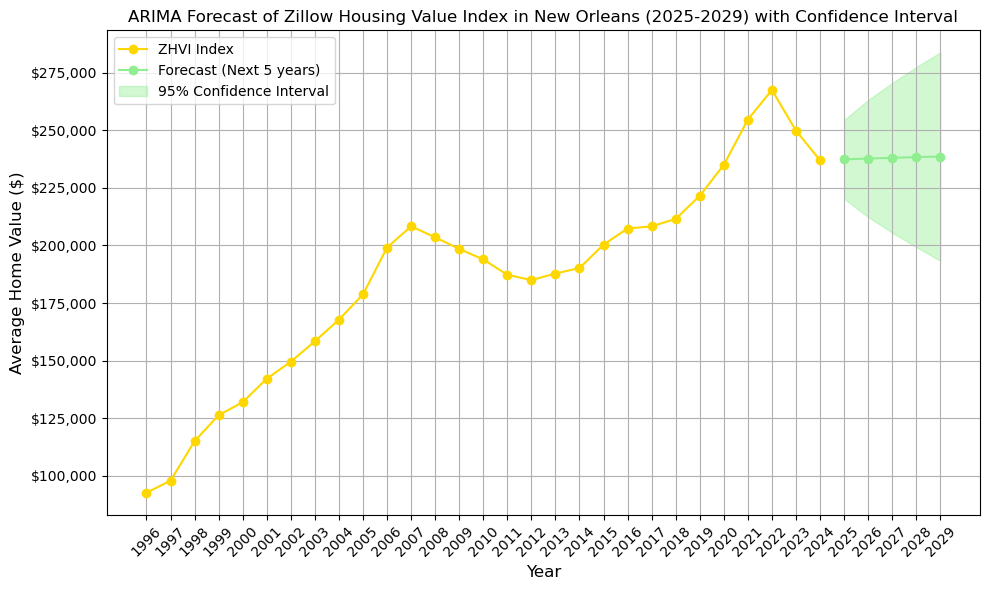

In [20]:
# Step 1: Clean the data to ensure it's in the correct format (univariate time series)
# We are going to reset the index and make sure we have one column of the data: 
# the 'Average Home Value', indexed by Year (time).

# Use only the column with the 'Average Home Value' (assuming that's what we want to predict)
home_value_series = yearly_averages.iloc[:, 0]  # This should be the average home value column

# Resetting index to ensure we have a simple integer index
home_value_series = home_value_series.reset_index(drop=True)

# Print the first few rows of the cleaned time series to check if it's correct
print(home_value_series.head())

# At this point, home_value_series is now a simple univariate time series, which ARIMA expects.

# Step 2: Fit the ARIMA model
# For simplicity, we'll start with ARIMA(1, 1, 1) which is a common choice.
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model
model = ARIMA(home_value_series, order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print the summary of the fitted model to inspect the results
print(model_fit.summary())

# Step 3: Forecast the next 5 years (2025 to 2029)
forecast_values = model_fit.forecast(steps=5)

# Print the forecasted values
print(forecast_values)

# Step 4: Get the confidence intervals for the forecasted values
forecast_conf_int = model_fit.get_forecast(steps=5).conf_int(alpha=0.05)

# Print the lower and upper confidence intervals
print("Lower Bound of Confidence Interval:")
print(forecast_conf_int.iloc[:, 0])

print("\nUpper Bound of Confidence Interval:")
print(forecast_conf_int.iloc[:, 1])

# Step 5: Visualize the forecast and confidence intervals

# Set up the years for the forecast (2025 to 2029)
forecast_years = np.arange(2025, 2030)

# Plotting the historical data
plt.figure(figsize=(10, 6))
plt.plot(yearly_averages.index, yearly_averages.iloc[:, 0], marker='o', linestyle='-', color='#FFD700', label='ZHVI Index')

# Plotting the forecasted values with a light green line
plt.plot(forecast_years, forecast_values, marker='o', linestyle='-', color='lightgreen', label='Forecast (Next 5 years)')

# Plotting the confidence interval
plt.fill_between(forecast_years, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='lightgreen', alpha=0.4, label='95% Confidence Interval')

# Adding labels and title
plt.title('ARIMA Forecast of Zillow Housing Value Index in New Orleans (2025-2029) with Confidence Interval', fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Home Value ($)', fontsize=12)

# Formatting the y-axis with dollar sign and commas
plt.gca().get_yaxis().set_major_formatter(plt.matplotlib.ticker.FuncFormatter(lambda x, loc: "${:,}".format(int(x))))

# Formatting the x-axis with year labels
plt.xticks(np.concatenate([yearly_averages.index, forecast_years]), rotation=45)

# Adding grid and legend
plt.grid(True)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

In [24]:
print(yearly_averages)

                 46  Month
Year                      
1996   92744.729573    7.0
1997   97954.519270    6.5
1998  115116.293319    6.5
1999  126395.820280    6.5
2000  132000.765937    6.5
2001  142200.734526    6.5
2002  149575.604605    6.5
2003  158446.772918    6.5
2004  167813.134161    6.5
2005  178778.654303    6.5
2006  199125.218321    6.5
2007  208290.861103    6.5
2008  203572.278957    6.5
2009  198498.483111    6.5
2010  193962.903019    6.5
2011  187297.976572    6.5
2012  184986.212133    6.5
2013  187834.974704    6.5
2014  190222.051881    6.5
2015  200364.494484    6.5
2016  207370.853614    6.5
2017  208308.081714    6.5
2018  211548.544647    6.5
2019  221549.690080    6.5
2020  234961.804566    6.5
2021  254651.587519    6.5
2022  267466.572634    6.5
2023  249840.968443    6.5
2024  236965.417304    6.0
